In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

import numpy as np
from animate_GD import animate_GD

### Loss function

In [2]:
from GD_utils import sigmoid, make_3D_loss_surface

wi, bi = 3.4, 1.7
X = np.array([-2, 0.15, -1.1, 0, -0.1, 1])
Y = sigmoid(X, wi, bi)
fig = make_3D_loss_surface(X, wi, bi)

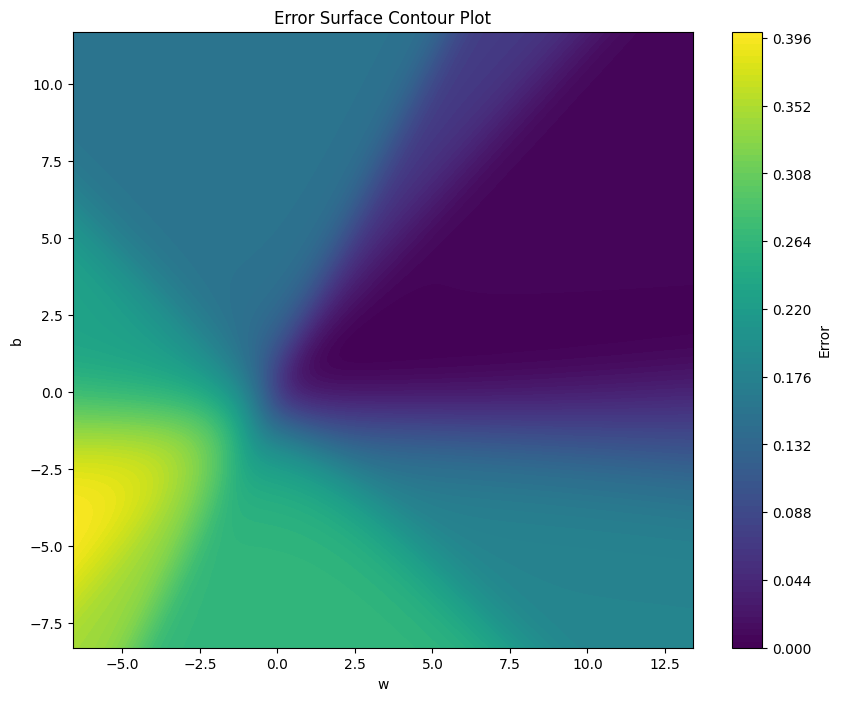

In [3]:
from GD_utils import sigmoid, make_2D_loss_surface

contour = make_2D_loss_surface(X, wi, bi)

### Gradient Descent

In [ ]:
from GD_utils import MSE_grad_w, MSE_grad_b

def VGD_gen(X, Y, w, b, skip_epochs=10, eta = 1.0):
  # The extra four yields are done because for some reason during the animation generation, FuncAnimation seemed to be taking parameters 4 epochs ahead as the initial parameters. So this is just a hacky way of counteracting that.
  yield w, b
  yield w, b
  yield w, b
  yield w, b

  while True:
    for _ in range(skip_epochs):
      dw, db = 0, 0

      for x, y in zip(X, Y):
        y_pred = sigmoid(x, w, b)
        dw += MSE_grad_w(y_pred, x, y)
        db += MSE_grad_b(y_pred, y)

      w -= eta * dw
      b -= eta * db
  
    yield w,b

In [6]:
GDs = [VGD_gen(X, Y, -6, -6), VGD_gen(X, Y, 1, 0)]
labels = ["VGD starting from (-6, -6)", "VGD starting from (1, 0)"]
animate_GD(X, wi, bi, GDs, labels, frames=10)